# Calculation general flare distributions in $\mu$

In [2]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt


In [3]:
# general distribution for area 
def rice_dist(x, sigma, nu):
    x = np.abs(x)
    return x / sigma**2 * np.exp( - (x**2 + nu **2 ) / (2 * sigma **2)) * sc.iv(0, (x * nu / sigma**2))

sigma_fit, nu_fit = (9.02769086 / 180 * np.pi, 10.48768514 / 180 * np.pi)

def rho(alpha, err=0.001):
    return rice_dist(np.pi / 2 - alpha, sigma_fit, nu_fit) / 2 / np.pi / (np.sin(alpha) + err) / 2 
            # fit of dist when integrated over phi and absolute value so accounting for that

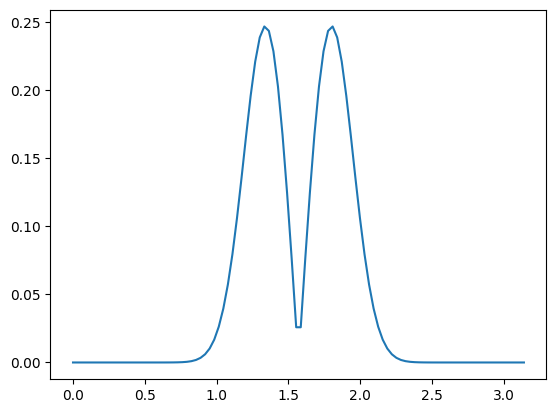

In [4]:
alpha = np.linspace(0, np.pi, 100)
plt.plot(alpha, rho(alpha))

In [6]:
f = lambda x: rice_dist(x, sigma_fit, nu_fit)

from scipy.integrate import quad

quad(f,0, np.pi)

(1.0, 2.5350408352359244e-09)

Therefore density is $$\rho_\mu(\mu) = \frac{2}{\sin \theta} \int_{[0, 2\pi]}d\phi \rho (\alpha(\theta, \phi))
.$$
where
$$
\cos \alpha = \sin \tau \sin \theta \cos \phi +\cos \theta \cos \tau  $$
and $\mu = \cos \theta$

In [7]:
# general distribution for given tau


def get_alpha(tau, theta, phi):
    return np.arccos( np.sin( tau ) * np.sin(theta) * np.cos(phi) + np.cos(tau) * np.cos(theta))

def rho_mu(mu, tau):
    theta = np.arccos(mu)
    I = lambda phi: rho(get_alpha(tau, theta, phi))
    return 2 / np.sin(theta) * quad(I, 0, 2*np.pi)[0]

def rho_mus(mus, tau):
    return [ rho_mu(mu,tau) for mu in mus]
    


In [8]:
get_alpha(np.pi/2, np.pi/2, np.pi)

3.141592653589793

0.0 (1.0444799498263733, 3.4624418412490554e-14)
0.39269908169872414 (1.0907400718840428, 1.5827368759529876e-08)
0.7853981633974483 (1.26413287895808, 5.576092920733799e-10)
1.1780972450961724 (1.8120614544617528, 1.2667184190462422e-08)
1.5707963267948966 (1.8673986986552276, 2.723071393651293e-10)


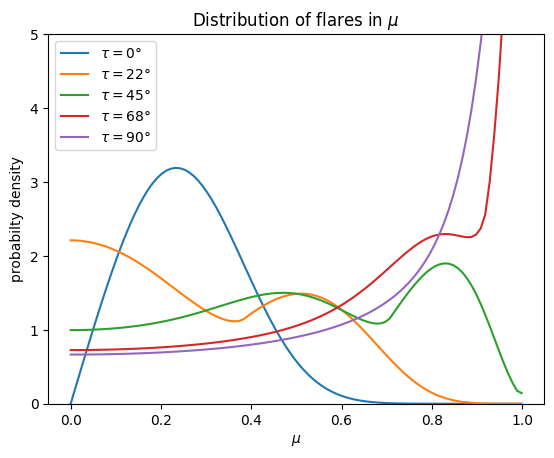

In [9]:
rho_mu_of_tau = lambda tau : lambda mu : rho_mu(mu, tau)


mu = np.linspace(0,0.999, 100)

for tau in np.linspace(0,np.pi/2, 5):
    plt.plot(mu, rho_mus(mu, tau), label=fr'$\tau=${round(tau*180/np.pi)}°')
    print(tau, quad(rho_mu_of_tau(tau), 0, 1))
    
plt.ylim(0,5)
plt.title(r"Distribution of flares in $\mu$")
plt.xlabel(r"$\mu$")
plt.ylabel("probabilty density")
plt.legend()

0.0 (0.9999895552005018, 4.760154232320412e-14)
0.39269908169872414 (0.999989549299772, 9.73148751799287e-09)
0.7853981633974483 (0.9999895534525512, 4.160154561709457e-09)
1.1780972450961724 (0.9999895494451105, 1.0553222041749711e-09)
1.5707963267948966 (0.9999895552005726, 5.994903906625382e-09)


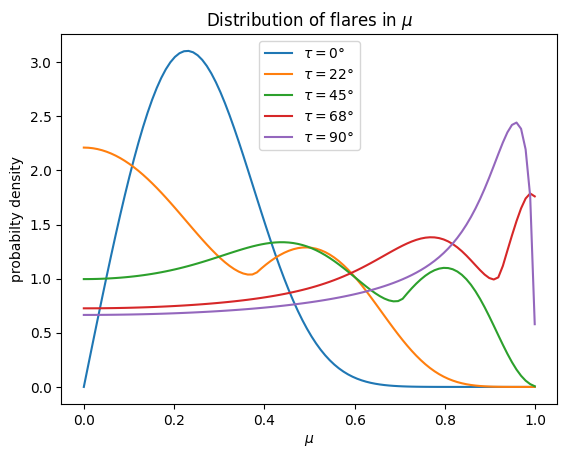

In [10]:
rho_mu_of_tau = lambda tau : lambda mu : rho_mu(mu, tau)* (1-mu**2)**0.5

def rho_mus2(mus, tau):
    return [ rho_mu(mu,tau) * (1-mu**2)**0.5 for mu in mus]

mu = np.linspace(0,0.999, 100)

for tau in np.linspace(0,np.pi/2, 5):
    plt.plot(mu, rho_mus2(mu, tau), label=fr'$\tau=${round(tau*180/np.pi)}°')
    print(tau, quad(rho_mu_of_tau(tau), 0, 1))

# plt.ylim(0,5)
plt.title(r"Distribution of flares in $\mu$")
plt.xlabel(r"$\mu$")
plt.ylabel("probabilty density")
plt.legend()

# Other distributions:
## Normal around the equatator

Text(0, 0.5, 'probability density per unit area')

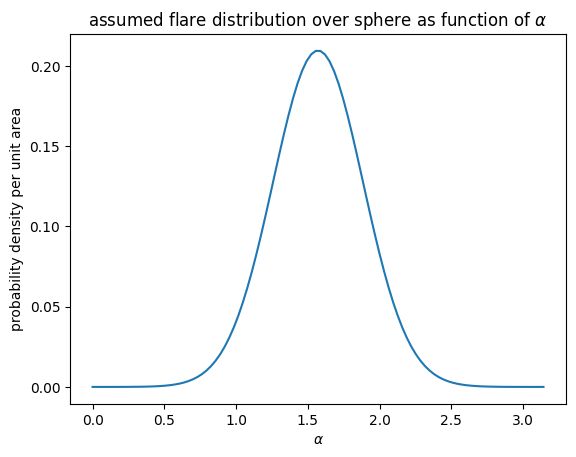

In [23]:
from scipy.stats import norm

def rho(alpha, loc=np.pi/2, scale = 0.3, err = 0.01):
    return norm.pdf(alpha, loc, scale) / 2 / np.pi / (np.sin(alpha) + err) 

alpha = np.linspace(0, np.pi, 100)
plt.plot(alpha, rho(alpha))
plt.title(r"assumed flare distribution over sphere as function of $\alpha$")
plt.xlabel(r"$\alpha$")
plt.ylabel('probability density per unit area')

0.0 (0.9895962000276162, 5.042964046353404e-09)
0.39269908169872414 (0.9895961988532547, 1.516983175045775e-09)
0.7853981633974483 (0.9895962002095553, 4.501296178332404e-09)
1.1780972450961724 (0.9895961876136867, 4.098245470594385e-09)


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_13940\4038941018.py:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return 2 / np.sin(theta) * quad(I, 0, 2*np.pi)[0]


1.5707963267948966 (0.989596200117882, 1.3436281436004267e-11)


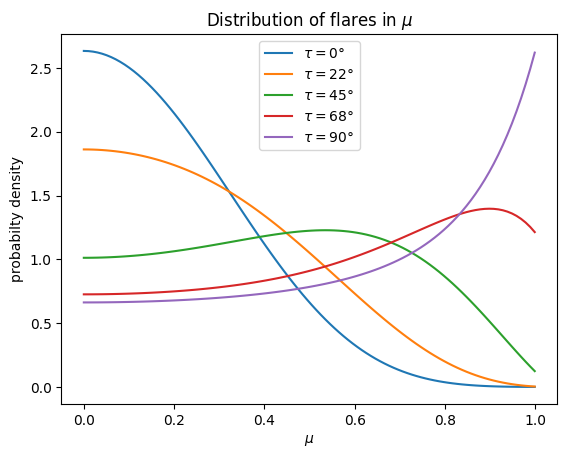

In [17]:
rho_mu_of_tau = lambda tau : lambda mu : rho_mu(mu, tau)* (1-mu**2)**0.5

def rho_mus2(mus, tau):
    return [ rho_mu(mu,tau) * (1-mu**2)**0.5 for mu in mus]

mu = np.linspace(0,0.999, 100)

for tau in np.linspace(0,np.pi/2, 5):
    plt.plot(mu, rho_mus2(mu, tau), label=fr'$\tau=${round(tau*180/np.pi)}°')
    print(tau, quad(rho_mu_of_tau(tau), 0, 1))

# plt.ylim(0,5)
plt.title(r"Distribution of flares in $\mu$")
plt.xlabel(r"$\mu$")
plt.ylabel("probabilty density")
plt.legend()

## uniform distribution

Text(0, 0.5, 'probability density per unit area')

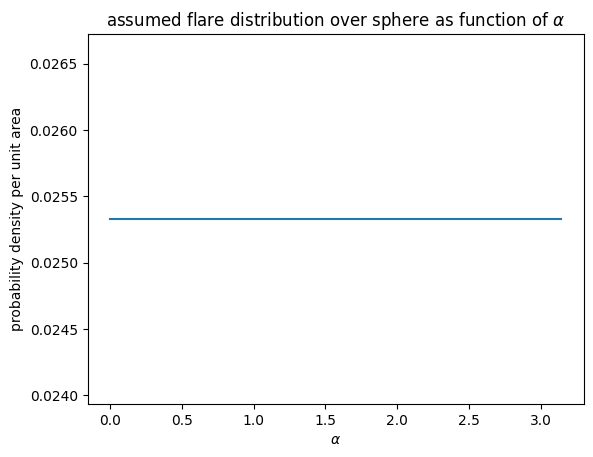

In [24]:
def rho(alpha, loc=np.pi/2, scale = 0.5):
    return alpha * 0 + 1 / np.pi**2 / 4 

alpha = np.linspace(0, np.pi, 100)
plt.plot(alpha, rho(alpha))
plt.title(r"assumed flare distribution over sphere as function of $\alpha$")
plt.xlabel(r"$\alpha$")
plt.ylabel('probability density per unit area')

0.0 (0.3183098861837907, 3.5339496460705744e-15)
0.39269908169872414 (0.3183098861837907, 3.5339496460705744e-15)
0.7853981633974483 (0.3183098861837907, 3.5339496460705744e-15)
1.1780972450961724 (0.3183098861837907, 3.5339496460705744e-15)
1.5707963267948966 (0.3183098861837907, 3.5339496460705744e-15)


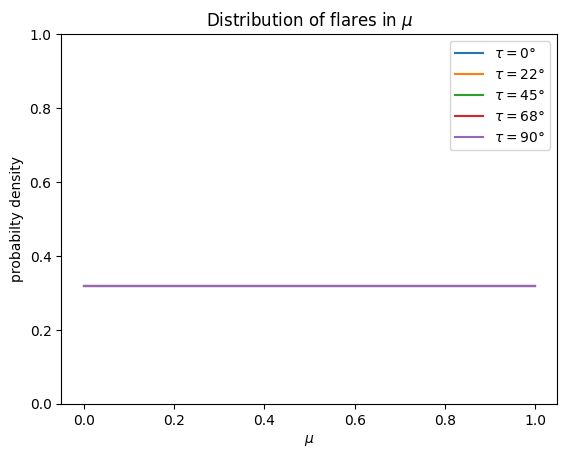

In [22]:
rho_mu_of_tau = lambda tau : lambda mu : rho_mu(mu, tau)* (1-mu**2)**0.5

def rho_mus2(mus, tau):
    return [ rho_mu(mu,tau) * (1-mu**2)**0.5 for mu in mus]

mu = np.linspace(0,0.999, 100)

for tau in np.linspace(0,np.pi/2, 5):
    plt.plot(mu, rho_mus2(mu, tau), label=fr'$\tau=${round(tau*180/np.pi)}°')
    print(tau, quad(rho_mu_of_tau(tau), 0, 1))

plt.ylim(0,1)
plt.title(r"Distribution of flares in $\mu$")
plt.xlabel(r"$\mu$")
plt.ylabel("probabilty density")
plt.legend()